### 3. What is the highest paying programming language in 2018?

Now we have come to the last question.
What is the income of the developers based on the programming language they use?
The library we will using is still same as the first and second question
We will build bar chart just like question 1.
For this question I use the data from Stackoverflow survey 2018

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read stackoverflow survey data 2018
df_2018 = pd.read_csv("./input/2018 Survey Result.csv")
df_2018['Year'] = '2018'

/home/jupyter/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# We only need information of the language that respondent worked with and the salary without involving unique respondents

df_2018_lang_used = df_2018[['LanguageWorkedWith','ConvertedSalary']]
df_2018_lang_used= df_2018_lang_used[df_2018_lang_used['ConvertedSalary'].notnull()]

In [4]:
def splitter(values):
    '''
    Description : split grouping values using semicolon (;) separator
    
    INPUT:
    values - each row in a dataframe
    
    OUTPUT:
    list - list that containing items (language) that have been split
    
    '''
    return list(itertools.product( *[str(v).split(';') for v in values]))

def expand(df):
    
    '''
    INPUT:
    df - a dataframe that contains grouping values inside a column/columns that needs to be splitted
    
    OUTPUT: 
    a fresh rebuild dataframe
    
    '''
    tuples=list()
    for i,row in df.iterrows():
        tuples.extend(splitter(row))
    return  pd.DataFrame.from_records(tuples,columns=df.columns)

In [5]:
# split grouped language
df_2018_lang_used = expand(df_2018_lang_used)

In [6]:
df_2018_lang_used['ConvertedSalary'] = (pd.to_numeric(df_2018_lang_used['ConvertedSalary'])).astype(int)

In [7]:
df_2018_group = pd.to_numeric(df_2018_lang_used['ConvertedSalary']).groupby(df_2018_lang_used['LanguageWorkedWith'])

In [8]:
# Find the median of each language. We are not using mean because the salary collected is from all over the world. 
# So in this case, using median will be more standardize than mean

df_2018_group = df_2018_group.median().reset_index()
df_2018_group.head()

,LanguageWorkedWith,ConvertedSalary
0,Assembly,43275.0
1,Bash/Shell,64866.0
2,C,46992.0
3,C#,59000.0
4,C++,50000.0


In [21]:
def plot_barh(df,x_col,y_col):
    '''
    INPUT:
    df- a dataframe that ready to be plotted, must contains x, y value
    x_col = column name that will become the index
    y_col = column name that will become the value
    
    OUTPUT:
    a bar chart
    '''
    x_pos = [i for i, _ in enumerate(df[x_col])]
    plt.figure(figsize=(10,10))
    plt.title('Salary per Programming Language',fontsize=20)
    plt.xlabel('Salary ($)', fontsize=12)
    plt.barh(x_pos,df[y_col])
    plt.yticks(x_pos, df[x_col])
    plt.show()

In [14]:
df_2018_group = df_2018_group[df_2018_group['ConvertedSalary']!='nan']

In [15]:
df_2018_group = df_2018_group.sort_values('ConvertedSalary',ascending=True)

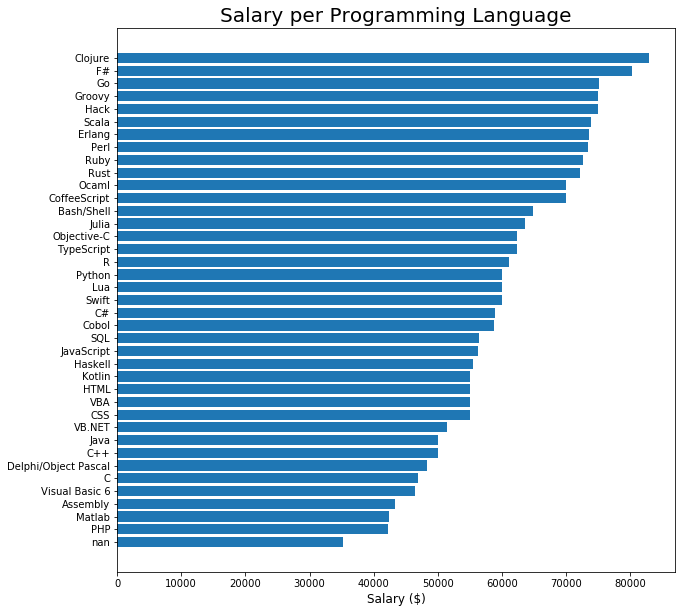

In [22]:
plot_barh(df_2018_group,'LanguageWorkedWith','ConvertedSalary')

Based on stackoverflow survey 2018, Clojure is the highest paying programming language with median salary more than $80.000